In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import fashion_mnist

(x_train, t_train), (x_test, t_test) = fashion_mnist.load_data()

print('train shape = ', x_train.shape, ', train label shape = ', t_train.shape)
print('test shape = ', x_test.shape, ', test label shape = ', t_test.shape)

print('\n train label = ', t_train) # 학습데이터 정답 출력
print(' test label = ', t_test) # 테스트 데이터 정답 출력

4431872/4422102 [==============================] - 0s 0us/step
train shape =  (60000, 28, 28) , train label shape =  (60000,)
test shape =  (10000, 28, 28) , test label shape =  (10000,)

 train label =  [9 0 0 ... 3 0 5]
 test label =  [9 2 1 ... 8 1 5]


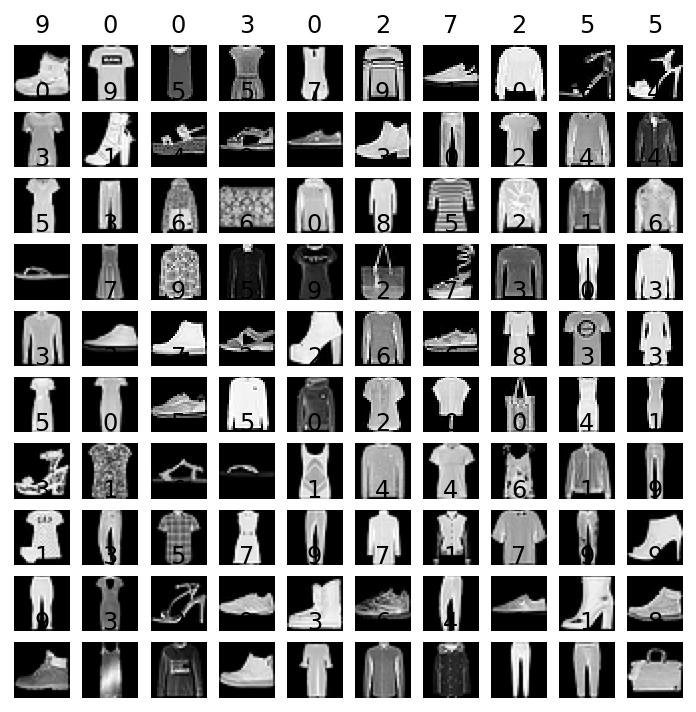

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))

for index in range(100): # 100개 이미지 출력
    plt.subplot(10, 10, index + 1) # 10행 10열
    plt.imshow(x_train[index], cmap='gray')
    plt.axis('off') # 축 없앰
    plt.title(str(t_train[index]))
plt.show()

## fashion_mnist class
- 0 : T-shirt/top
- 1 : Trouse
- 2 : Pullover
- 3 : Dress
- 4 : Coat
- 5 : Sandal
- 6 : Shirt
- 7 : Sneaker
- 8 : Bag
- 9 : Ankle boot

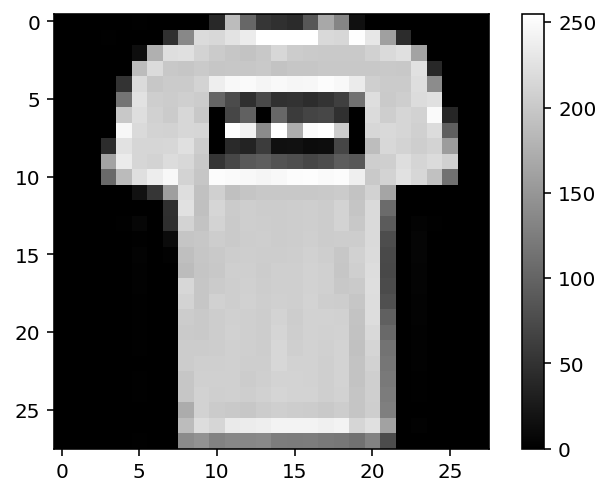

In [4]:
plt.imshow(x_train[1], cmap='gray')
plt.colorbar()
plt.show()

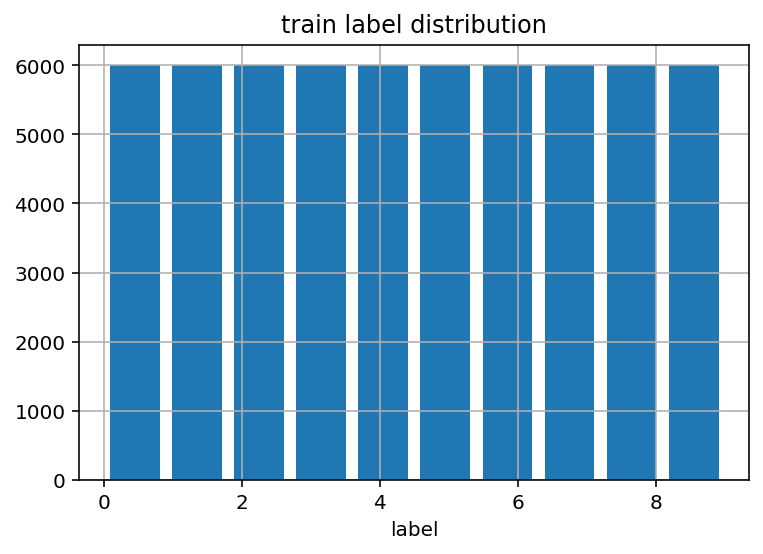

In [5]:
plt.title('train label distribution')
plt.grid()
plt.xlabel('label')
plt.hist(t_train, bins=10, rwidth=0.8)
plt.show()

In [8]:
label_distribution = np.zeros(10)

for idx in range(len(t_train)):
    label = int(t_train[idx])
    label_distribution[label] = label_distribution[label] + 1
    
print(label_distribution)

[6000. 6000. 6000. 6000. 6000. 6000. 6000. 6000. 6000. 6000.]


In [9]:
x_train = (x_train - 0.0) / (255.0 - 0.0)
x_test = (x_test - 0.0) / (255.0 - 0.0)

t_train = tf.keras.utils.to_categorical(t_train, num_classes=10)
t_test = tf.keras.utils.to_categorical(t_test, num_classes=10)

In [10]:
print(t_train[1])
print(t_test[1])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [11]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [12]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [13]:
hist = model.fit(x_train, t_train, epochs=30, validation_split=0.3)

Epoch 1/30
1313/1313 [==============================] - 2s 2ms/step - loss: 0.5412 - accuracy: 0.8120 - val_loss: 0.4443 - val_accuracy: 0.8396
Epoch 2/30
1313/1313 [==============================] - 2s 2ms/step - loss: 0.4014 - accuracy: 0.8581 - val_loss: 0.4250 - val_accuracy: 0.8499 - loss: 0.4022 - accuracy: 0.85
Epoch 3/30
1313/1313 [==============================] - 2s 2ms/step - loss: 0.3612 - accuracy: 0.8701 - val_loss: 0.3710 - val_accuracy: 0.8692
Epoch 4/30
1313/1313 [==============================] - 2s 1ms/step - loss: 0.3329 - accuracy: 0.8788 - val_loss: 0.3883 - val_accuracy: 0.8623
Epoch 5/30
1313/1313 [==============================] - 2s 2ms/step - loss: 0.3133 - accuracy: 0.8857 - val_loss: 0.3815 - val_accuracy: 0.8664
Epoch 6/30
1313/1313 [==============================] - 2s 2ms/step - loss: 0.2975 - accuracy: 0.8897 - val_loss: 0.3464 - val_accuracy: 0.8756
Epoch 7/30
1313/1313 [==============================] - 2s 2ms/step - loss: 0.2828 - accuracy: 0.8953 - 

In [14]:
model.evaluate(x_test, t_test)

313/313 [==============================] - 0s 918us/step - loss: 0.4288 - accuracy: 0.8830


[0.42880526185035706, 0.8830000162124634]

In [15]:
predictions = model.predict(x_test)

In [16]:
predictions[0]

array([9.8497079e-11, 8.4875142e-11, 1.1369804e-12, 5.9301143e-14,
       1.7093251e-12, 5.9271260e-06, 2.6234495e-10, 4.0364923e-04,
       5.3519109e-09, 9.9959046e-01], dtype=float32)

In [17]:
label=np.argmax(predictions[1])
label

2

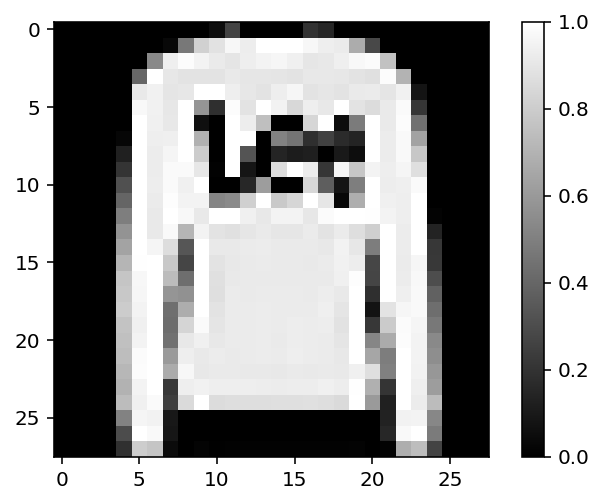

In [18]:
plt.imshow(x_test[1], cmap='gray')
plt.colorbar()
plt.show()

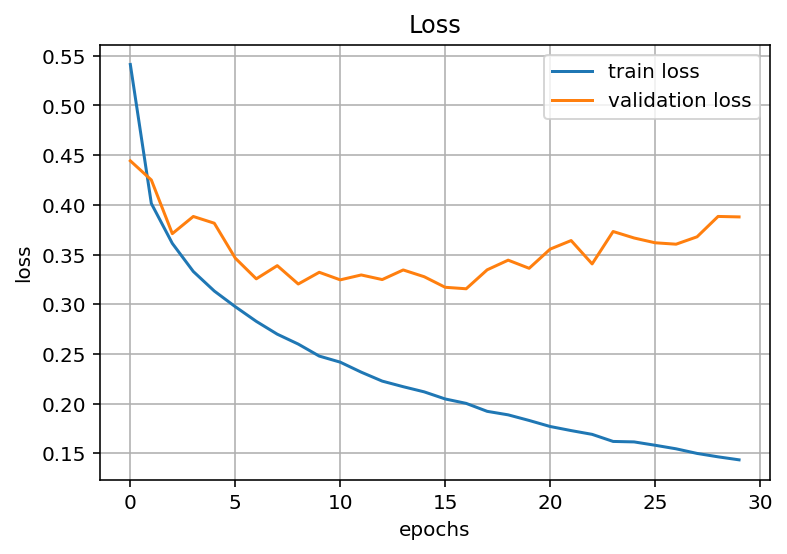

In [19]:
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')

plt.legend(loc='best')
plt.show()